In [24]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# FOR KNN AND OTHER MODELING
from scipy.optimize import curve_fit
# from splinter import Browser
# from bs4 import BeautifulSoup as BS
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# # FOR TF MODELS
# import keras.models
# import keras.layers
# import keras.utils
# from keras.models import Sequential
# from keras.layers import Dense, Dropout


In [25]:
idahoCounties = ['Ada', 'Adams', 'Bannock', 'Bear Lake', 'Benewah', 'Bingham', 'Blaine', 'Boise', 'Bonner', 'Bonneville', 'Boundary','Butte', 
 'Camas', 'Canyon', 'Caribou', 'Cassia', 'Clark', 'Clearwater', 'Custer', 'Elmore', 'Franklin', 'Fremont', 'Gem', 'Gooding', 
 'Idaho', 'Jefferson', 'Jerome' 'Kootenai', 'Latah', 'Lemhi', 'Lewis', 'Lincoln', 'Madison', 'Minidoka','Nez Perce', 
 'Oneida', 'Owyhee', 'Payette', 'Power', 'Shoshone', 'Teton', 'Twin Falls', 'Valley', 'Washington']
        

notIdahoCounties = ['Baker', 'Beaverhead', 'Box Elder', 'Elko', 'Gallatin', 'Malheur', 'Mineral', 'Missoula', 'Ravalli', 'Sanders']

# IMPORT DATA

In [26]:
# File path for the CSV Files
idahoFireWeatherDrought = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_Drought_df = pd.read_csv(idahoFireWeatherDrought)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [27]:
# CONVERT DATE TO DATETIME FORMAT
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'])
idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'])

# CREATE COLUMNS WE NEED
idaho_Fire_Weather_Drought_df['FIRE_DAYS'] = (((idaho_Fire_Weather_Drought_df['CONT_DOY']) + 1) - idaho_Fire_Weather_Drought_df['DISCOVERY_DOY'])
idaho_Fire_Weather_Drought_df['COUNTY_NAME'] = (idaho_Fire_Weather_Drought_df['FIPS_NAME'])
# Create month column
idaho_Fire_Weather_Drought_df['DISCOVERY_MONTH_CONVERTED']=idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'].apply(lambda x: int(x.strftime('%m')))

# FILTER ROWS FOR FIRES IN COUNTIES OUTSIDE IDAHO
idaho_Fire_Weather_Drought_df = idaho_Fire_Weather_Drought_df[idaho_Fire_Weather_Drought_df['NAME'].isin(idahoCounties)]

# View the Data in the Dataframe
# print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4,FIRE_DAYS,COUNTY_NAME,DISCOVERY_MONTH_CONVERTED
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,77.00,69.08,69.98,71.06,1,Fremont,7
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,64.04,62.06,69.08,66.92,1,Bannock,7
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.8,64.94,68.00,71.96,71.96,1,Bannock,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,15481,1847545,Point,1,1847545,300274025,SFO-2015IDIDL6102015028,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,64.58,60.80,59.90,60.62,2,Boise,10
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,0.0,0.9,0.0,58.28,60.08,66.74,59.36,2,Boundary,10
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,0.9,0.0,0.0,60.08,66.74,59.36,50.00,1,Boundary,10
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,67.28,58.46,61.52,63.68,1,Valley,10


In [28]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [29]:
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

In [30]:
# I'm intentionally not looking at "LoanAmount", because I don't want to print out every possible loan value
contains_null = ['LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']

# for col in contains_null:
#     print(f"List of unique labels for {col}:::{set(idaho_Fire_Weather_Drought_df[col])}")

In [31]:
# # Get dummy variables for nominal property column
# # idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["CITY"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# # FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # # replace values in each column according to the dictionaries above
# # clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

# MODELING

## CREATING A KNN NETWORK MODEL

In [32]:
# idaho_Fire_Weather_Drought_df

In [33]:
Corr_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
Corr_df['FIRE_SIZE_CLASS']= Corr_df['FIRE_SIZE_CLASS'].astype('category').cat.codes

Corr_df.corr()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FIRE_SIZE_CLASS,AVE_SIZE12,CROP_ACR12,None,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
FIRE_SIZE_CLASS,1.000000,0.163815,0.153558,-0.061832,0.061832,0.085644,0.033487,0.004514,-0.003069,-0.028075,-0.055122,-0.075665,-0.080226,0.011915,0.009872,0.043749,0.078619
AVE_SIZE12,0.163815,1.000000,0.577044,-0.132600,0.132600,0.141231,0.098384,0.094162,0.044858,-0.005764,-0.019457,-0.006819,-0.014886,0.021817,0.030689,0.047380,0.046041
CROP_ACR12,0.153558,0.577044,1.000000,-0.131695,0.131695,0.139625,0.109089,0.136077,0.102025,-0.003605,-0.024724,-0.031351,-0.012383,-0.052992,-0.059147,-0.046783,-0.023749
None,-0.061832,-0.132600,-0.131695,1.000000,-1.000000,-0.722797,-0.471042,-0.246894,-0.088997,0.007993,-0.011623,-0.008244,0.007870,0.021974,0.036124,0.032575,0.031823
D0,0.061832,0.132600,0.131695,-1.000000,1.000000,0.722797,0.471042,0.246894,0.088997,-0.007993,0.011623,0.008244,-0.007870,-0.021974,-0.036124,-0.032575,-0.031823
D1,0.085644,0.141231,0.139625,-0.722797,0.722797,1.000000,0.704019,0.371050,0.134097,0.006476,0.009556,-0.006602,-0.032908,-0.017714,-0.030196,-0.023075,-0.011003
D2,0.033487,0.098384,0.109089,-0.471042,0.471042,0.704019,1.000000,0.585870,0.216305,0.024966,0.013385,0.009985,-0.021172,-0.074823,-0.087505,-0.090341,-0.086722
D3,0.004514,0.094162,0.136077,-0.246894,0.246894,0.371050,0.585870,1.000000,0.440823,-0.002278,-0.012112,-0.020128,-0.016641,-0.115261,-0.120978,-0.126993,-0.114686
D4,-0.003069,0.044858,0.102025,-0.088997,0.088997,0.134097,0.216305,0.440823,1.000000,0.001515,0.001186,0.001011,-0.002063,-0.056946,-0.078471,-0.077982,-0.073660
DAY_PRCP_1,-0.028075,-0.005764,-0.003605,0.007993,-0.007993,0.006476,0.024966,-0.002278,0.001515,1.000000,0.136445,0.051241,0.008809,-0.117898,-0.153304,-0.124828,-0.094944


In [34]:
# INVESTIGATING INPUTS
# # Possible X columns
# New_df = idaho_Fire_Weather_Drought_df[['DISCOVERY_DATE_CONVERTED', 'LATITUDE', 'LONGITUDE', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
# # New_df['FIRE_SIZE_CLASS']= New_df['FIRE_SIZE_CLASS'].astype('category').cat.codes
# # New_df['AVE_FAM_SZ']= New_df['AVE_FAM_SZ'].apply(lambda x: x//1)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=21)


# New_df = pd.get_dummies(New_df, columns=['NAME'])
# New_df2=New_df

# # New_df = New_df.drop(['FIRE_SIZE_CLASS'], axis=1)
# # X.head()
# # print(X.keys())
# # X = X.values.reshape(-1, 72)

# X_Array = New_df.to_numpy()
# pca.fit(X_Array)
# # print(pca.singular_values_)
# x = pca.transform(X_Array)
# x
# # print(X.shape)
# # type(X)
# # X

In [35]:
# CREATE X VALUES
# Create X Input by keeping columns from df
X = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 
                                   'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 
                                   'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# GET AVERAGE VALUES FOR DROUGHT (D0-D4), PRECIPITATION AND TEMP
X['AV_D'] = (X['D0'] + X['D1'] + X['D2'] + X['D3'] + X['D4'])  / 5
X['AV_PRCP'] = (X['DAY_PRCP_1'] + X['DAY_PRCP_2'] + X['DAY_PRCP_3'] + X['DAY_PRCP_4'])  / 4
X['AV_TEMP'] = (X['DAY_AVG_TEMP_1'] + X['DAY_AVG_TEMP_2'] + X['DAY_AVG_TEMP_3'] + X['DAY_AVG_TEMP_4'])  / 4

# ADD COLUMNS IDAHO COUNTIES THAT HAVE NO FIRE INFO (FOR COMPLETENESS)
X['NAME_Jerome'] = 0
X['NAME_Kootenai'] = 0

# DROP UNWANTED COLUMNS
X = X.drop(['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None',
'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4'], axis=1)
# X = pd.get_dummies(X, columns=['STAT_CAUSE_DESCR'])
X = pd.get_dummies(X, columns=['NAME'])

# --------------------------------------------------------------------------- #
# # TO OUTPUT CSVs FILTERED BY FIRE SIZE
# # Filter 
# class1_df = X.loc[(X['FIRE_SIZE_CLASS']== 'A')]
# class1_df

# # # OUTPUT THE AND UPDATED CSV FILE
# Class1_firesOutput_path = os.path.join("..", "Data", "Class1_fires.csv")
# with open(Class1_firesOutput_path, 'w') as csvfile:
#         class1_df.to_csv(Class1_firesOutput_path, index=False)
# --------------------------------------------------------------------------- #

# # Interim views
# print(X.dtypes)
# print(len(X.columns))
# print(X.columns)
# # X

# seed values for reshape and no of ML runs (epochs)
NoOfCols = 48
NoOfRuns = 2000

# # Reshape X from df to array v1
X = X.values.reshape(-1, NoOfCols)

# # Reshape X from df to array v2
# X = X.to_numpy()

# # View output
print(f"Shape of X Input is {X.shape}")
print(f"Type of X input is {type(X)}")
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Shape of X Input is (14902, 48)
Type of X input is <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

array([[ 7.   , 60.   ,  0.125, ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 40.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 40.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [10.   , 80.   ,  0.225, ...,  0.   ,  0.   ,  0.   ],
       [10.   , 60.35 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [10.   , 80.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

In [36]:
### CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS']]

# ADD COLUMNS FIRE_SIZE_FLAG COLUMN
y['FIRE_SIZE_FLAG'] = 0

# DROP CLASS A FIRES
# y = y.loc[(y['FIRE_SIZE_CLASS'] == 'B') | (y['FIRE_SIZE_CLASS'] == 'C') | (y['FIRE_SIZE_CLASS'] == 'D') | (y['FIRE_SIZE_CLASS'] == 'E') | (y['FIRE_SIZE_CLASS'] == 'F') | (y['FIRE_SIZE_CLASS'] == 'G')]
NoOfOutputs = 2

# CREATE A FIRE CLASS SIZE SIZE E, F, G = FLAG 1, SIZE A, B, C, D = FLAG 0
y.loc[(y['FIRE_SIZE_CLASS'] == 'D') | (y['FIRE_SIZE_CLASS'] == 'E') | (y['FIRE_SIZE_CLASS'] == 'F') | (y['FIRE_SIZE_CLASS'] == 'G'), 'FIRE_SIZE_FLAG'] = 1
# y.loc[(y['FIRE_SIZE_CLASS'] == 'C') | (y['FIRE_SIZE_CLASS'] == 'D'), 'FIRE_SIZE_FLAG'] = 1

# DROP FIRE_SIZE_CLASS COLUMNS
y = y.drop(['FIRE_SIZE_CLASS'], axis=1)

# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]
# y = pd.get_dummies(y, columns=["STAT_CAUSE_DESCR"])

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 

# View output
print(f"Shape of y is {y.shape}")
print(f"Type of y is {type(y)}")
y

Shape of y is (14902, 1)
Type of y is <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [37]:
# numpy.arange(10000)

In [38]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

In [40]:
### Encode the categorical target variable to the necessary format for the model
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Create 2 neural network with 1 hidden layer and 2 hidden layers

In [41]:
# Inputs
print(X_train.shape)
print(X_train_scaled.shape)
print(X_test.shape)
print(X_test_scaled.shape)

(11176, 48)
(11176, 48)
(3726, 48)
(3726, 48)


In [42]:
# Inputs
print(y_train_categorical.shape)
print(y_test_categorical.shape)

(11176, 2)
(3726, 2)


In [43]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

k_range = range(10, 40, 2)
opts_range = []

for k in k_range:
    # create the classifier for each value of K
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=k, p=1,
                     weights='uniform')
    # RUN MODEL TRAINING
    knn.fit(X_train, y_train_categorical)
    
    #Score with both test and train data
    train_score = knn.score(X_train, y_train_categorical)
    test_score = knn.score(X_test, y_test_categorical)
    
    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}: Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 10: Train/Test Score: 0.889/0.878
k: 12: Train/Test Score: 0.890/0.881
k: 14: Train/Test Score: 0.892/0.883
k: 16: Train/Test Score: 0.892/0.885
k: 18: Train/Test Score: 0.891/0.886
k: 20: Train/Test Score: 0.890/0.885
k: 22: Train/Test Score: 0.891/0.886
k: 24: Train/Test Score: 0.890/0.887
k: 26: Train/Test Score: 0.891/0.889
k: 28: Train/Test Score: 0.891/0.889
k: 30: Train/Test Score: 0.891/0.889
k: 32: Train/Test Score: 0.891/0.889
k: 34: Train/Test Score: 0.891/0.889
k: 36: Train/Test Score: 0.891/0.889
k: 38: Train/Test Score: 0.891/0.889


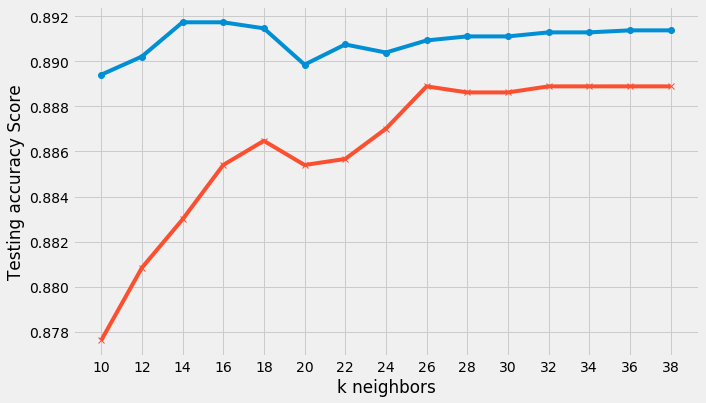

In [44]:
plt.figure(figsize=(10,6))

plt.plot(k_range, train_scores, marker='o')

plt.plot(k_range, test_scores, marker="x")

plt.xticks(k_range)

plt.xlabel("k neighbors")

plt.ylabel("Testing accuracy Score")

plt.show()

In [45]:
grid.best_params_

NameError: name 'grid' is not defined

In [ ]:
grid.best_score_

In [ ]:
# # --------------------------------------------------------------- #
# # SAVE MODEL
# # --------------------------------------------------------------- #
# # VIA JOBLIB
# # --------------------------------------------------------------- #
# # save your model by updating "your_name" with your name
# # and "your_model" with your model variable
# # be sure to turn this in to BCS
# # if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'knnModel_v1.sav'
# joblib.dump(knnModel, filename)

# # VIA PICKLE
# # --------------------------------------------------------------- #
# import pickle

# with open('knnModel_v2.pkl','wb') as modelFile:
#     pickle.dump(knnModel, modelFile)

In [ ]:
# # TEST MODEL WITH NEW DATA
# # --------------------------------------------------------------- #
# # LOAD MODEL via joblib
# # --------------------------------------------------------------- #

# # model_path = os.path.join("fires_class_model_v1.h5")
# # reloadedKnnModel = joblib.load(model_path, mmap_mode='r')

# # LOAD MODEL via pickle
# # --------------------------------------------------------------- #

# with open('knnModel_v2.pkl', 'rb') as modelReload:
#     reloadedKnnModel = pickle.load(modelReload)

# # IMPORT CSV FOR DF
# # --------------------------------------------------------------- #
# X_input_dfFormat = os.path.join("..", "Data", "X_input_dfFormat.csv")

# # Open the CSV Files, Convert to a Dataframe, and Save as a Variable
# X_input_dfFormat_df = pd.read_csv(X_input_dfFormat)

# # X_input_dfFormat_df['NAME_Lincoln']

# # PREP X VALUES FOR MODEL
# # --------------------------------------------------------------- #
# # # Reshape X from df to array v1
# newInput = X_input_dfFormat_df.values.reshape(-1, 58)

# # # # View output
# # print(f"Shape of X Input is {X.shape}")
# # print(f"Type of X input is {type(X)}")

# # RUN TEST
# # --------------------------------------------------------------- #
# # print(f"Model output: {np.argmax(reloadedKnnModel.predict(newInput), axis=1)}")
# # np.argmax(New_model.predict(new_data))

# # CREATE TO VIEW PREDICTIONS
# # --------------------------------------------------------------- #
# predictions_newInput = np.argmax(reloadedKnnModel.predict(newInput), axis=1)
# probs = reloadedKnnModel.predict(newInput)

# pred_df = pd.DataFrame({
#     "Predictions": predictions_newInput,
#     "P(0) model": np.round(probs[:, 0], 5),
#     "P(100) model": np.round(probs[:, 1], 5),
#     })

# pred_df
# # print(X_input_dfFormat_df['D1'])

In [ ]:

# knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
#                      weights='uniform')

# param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
#               'weights': ['uniform', 'distance'],
#               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#               }

# grid = GridSearchCV(knn_model, param_grid, verbose=-1, scoring='f1_micro', cv = 3)
# # 'average' : [None, 'micro', 'macro', 'weighted', 'samples']
# # f1_score(y_true, y_pred, average='weighted')